# Support Vector Machine (SVM)

- 딥러닝 이전에 분류에서 뛰어난 성능으로 많이 사용되었던 분류 모델
- 하나의 분류 그룹을 다른 그룹과 분리하는 최적의 경계를 찾아내는 알고리즘
- <span style='background-color:#fff5b1'>중간 크기의 **데이터셋과 특성이(Feature) 많은 복잡한 데이터셋에서 성능이 좋은 것**으로 알려져있다.</span>

## <span style='background-color:#fff5b1'>선형(Linear) SVM </span>

**선 (1)과 (2)중 어떤 선이 최적의 분류 선일까?**
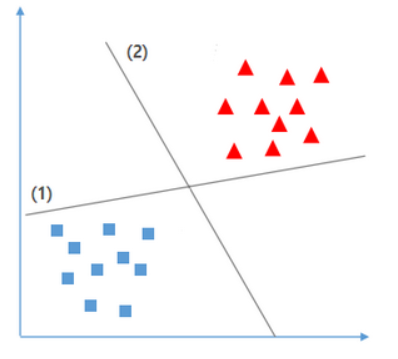

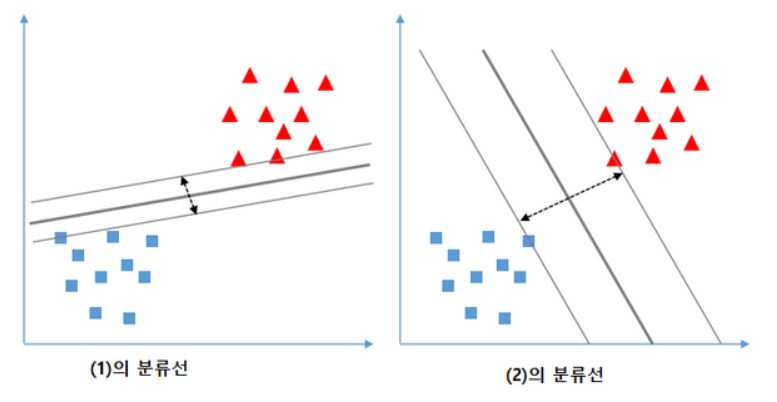

>- (2) 가 최적의 분류를 위한 경계선이다. 이유는 각 클래스의 별로 가장 가까이 있는 데이터간의 거리가 가장 넓기 때문이다. 넓다는 것은 그만큼 겹치는 부분이 적다는 것이므로 새로운 데이터를 예측할 때 모호성이 적어져서 맞을 확률이 더 높아지게 된다. <span style='background-color:#fff5b1'>**SVM 모델은 두 클래스 간의 거리를 가장 넓게 분리할 수있는 경계선을 찾는 것을 목표로 한다.**</span>

## <span style='background-color:#fff5b1'>SVM 목표: support vector간의 가장 넓은 margin을 가지는결정경계를 찾는다.</span>

- <span style='background-color:#fff5b1'>**Support Vector**</span>: 경계를 찾는데 기준이 되는 데이터포인트. <span style='background-color:#fff5b1'>**결정경계**</span>에 가장 가까이 있는 vector(데이터포인트)를 말한다.
- <span style='background-color:#fff5b1'>**margin**</span>: 두 support vector간의 너비
- margin이 넓은 결정경계를 만드는 함수를 찾는 것.
- 결정경계 => decision boundary라 말한다.

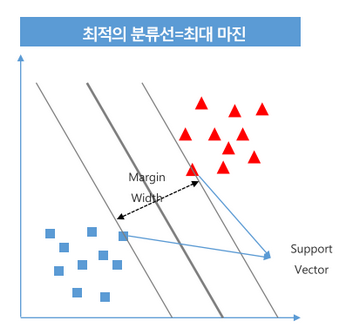

## <span style='background-color:#fff5b1'>규제 - Hard Margin, Soft Margin</span>

- SVM은 데이터 포인트들을 잘 분리하면서 Margin 의 크기를 최대화하는 것이 목적이다. 
    - Margin의 최대화에 가장 문제가 되는 것이 Outlier(이상치) 들이다. 
    - Train set의 Outlier들은 Overfitting에 주 원인이 된다.
- Margine을 나눌 때 Outlier을 얼마나 무시할 것인지에 따라 Hard margin과 soft margin으로 나뉜다.
- <span style='background-color:#fff5b1'>**Hard Margin**</span>
    - Outlier들을 무시하지 않고 Support Vector를 찾는다. 그래서 Support Vector와 결정 경계 사이의 거리 즉 Margin이 매우 좁아 질 수 있다. 학습시 이렇게 개별 데이터포인트들을 다 놓치지 않으려는 기준으로 결정 경계를 정해버리면 overfitting 문제가 발생할 수 있다.
- <span style='background-color:#fff5b1'>**Soft Margin**</span>    
    - 일부 Outlier들을 무시하고 Support Vector를 찾는다. 즉 Outlier들이 Margin 안에 어느정도 포함되도록 기준을 잡는다. 그래서 Support Vector와 결정 경계 사이 즉 Margin의 거리가 넓어진다. 얼마나 많은 Outlier들을 무시할 지는 하이퍼파라미터로 설정한다. 무시비율이 너무 커지면 잘 분리되야 하는 것들 까지 이상치로 판단해서 무시 하기 때문에 underfitting 문제가 발생할 수 있다.

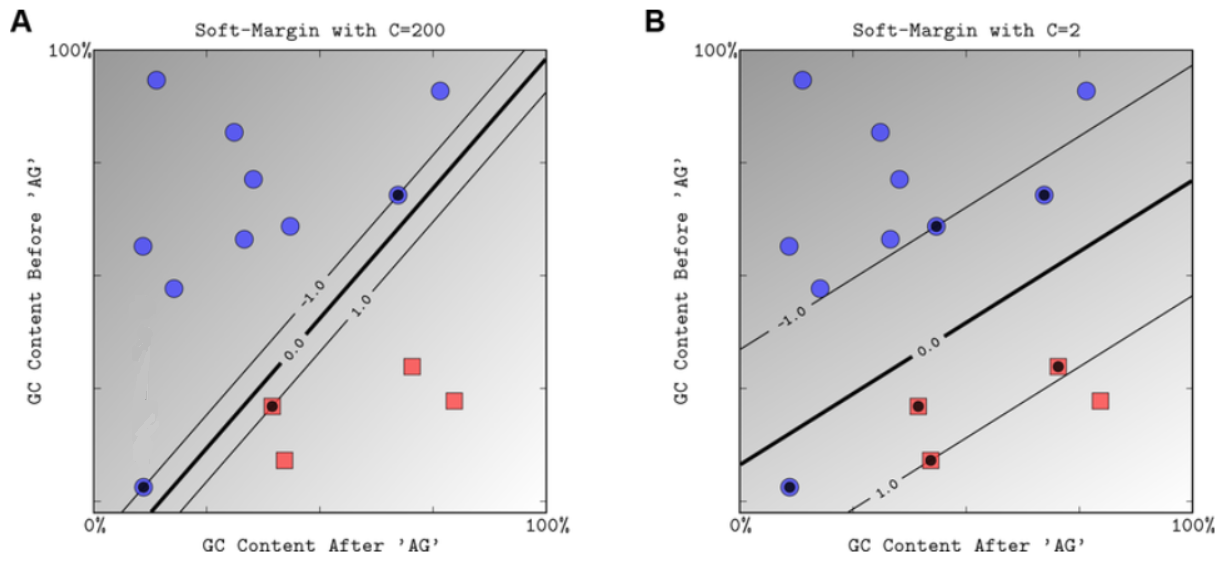

> - **A - Hard Margin, B - Soft Margin** 
>
>- 하드마진은,C의 값이 너무크면 <span style='background-color:#fff5b1'> **과적합(overfiting) 발생 => C를 조금 낮춘다.**</span>
>- 소프트마진,C의 값이 너무 작으면 <span style='background-color:#fff5b1'> **저적합(underfitin) 발생 => C를 조금 높인다.**</span>

### 하이퍼파라미터 C
- Outlier 를 무시하는 비율을 설정하는 하이퍼파라미터
- 노이즈가 있는 데이터나 선형적으로 분리 되지 않는 경우 **하이퍼파라미터인 C값을** 조정해 마진을 변경한다.
- 기본값 1
- 파라미터값을 크게주면 제약조건을 강하게 한다.
    - 마진폭이 좁아져 마진 오류가 작아지나 Overfitting이 일어날 가능성이 크다.
- 파라미터값을 작게 주면 제약조건을 약하게 한다.
    - 마진폭이 넓어져 마진 오류가 커진다. 
    - 훈련데이터에서는 성능이 안좋아지나 일반화(generalization)되어 테스트 데이터의 성능이 올라간다. 그러나 underfitting 이 날 가능성이 있다.

### Linear SVM에서 C의 변화에 따른 성능변화 확인

- <span style='background-color:#fff5b1'>overfitting: **C의 값을 줄인다.**</span>
- <span style='background-color:#fff5b1'>underfitting: **C의 값을 늘린다.**</span>

##### import

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

##### 데이터 로딩, train/test set 나누기

In [2]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

##### Feature scaling

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델생성 및 학습
- 규제 파라미터인 **C** 값을 변경하면서 성능 확인

In [4]:
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] # 1.0이 C의 기본값이다.
train_acc_list = []
test_acc_list = []

for c in c_list:
    #모델생성
    svc = SVC(kernel = 'linear', C = c, random_state = 0) #  앞에 코드와 LinearSVC() 와 같은 코드
    svc.fit(X_train_scaled, y_train)
    
    train_pred = svc.predict(X_train_scaled)
    test_pred = svc.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train, train_pred))
    test_acc_list.append(accuracy_score(y_test, test_pred))

##### 결과 확인

In [5]:
result = pd.DataFrame({
    'train':train_acc_list,
    'test':test_acc_list
}, index = c_list)

result.rename_axis('C', axis = 0, inplace = True)
result

,train,test
C,,
0.0001,0.643192,0.643357
0.0010,0.936620,0.944056
0.0100,0.978873,0.965035
0.1000,0.990610,0.958042
1.0000,0.990610,0.965035
10.0000,0.992958,0.958042
100.0000,1.000000,0.916084


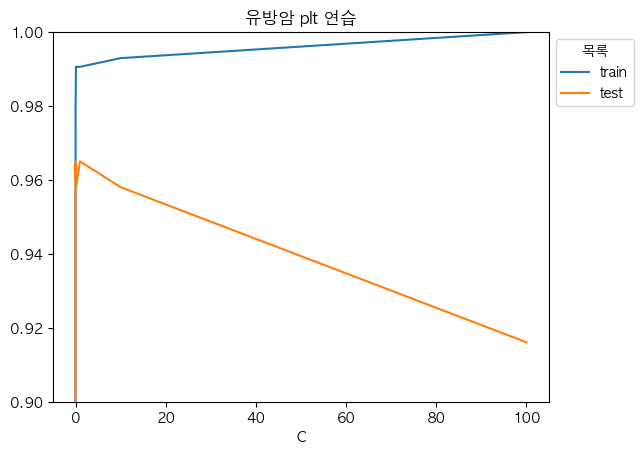

In [6]:
import matplotlib.pyplot as plt
result.plot(ylim = (0.9, 1.0))
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), title = '목록')
plt.title('유방암 plt 연습')

plt.show()

### c_list 값 => log10 적용

In [7]:
c = np.log10(np.array(c_list))
print(c_list)
print(c)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
[-4. -3. -2. -1.  0.  1.  2.]


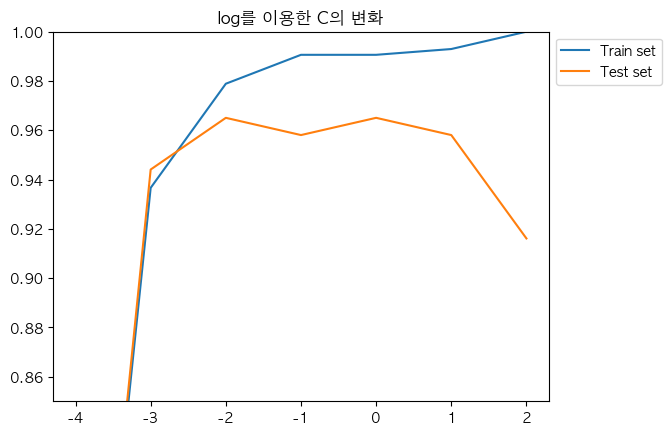

In [8]:
plt.plot(c, result['train'], label = 'Train set')
plt.plot(c, result['test'], label = 'Test set')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.title('log를 이용한 C의 변화')
plt.ylim(0.85, 1.0)
plt.show()

## Kernel SVM (비선형(Non Linear) SVM)
### 비선형데이터 셋에 SVM 적용
- 선형으로 분리가 안되는 경우는?
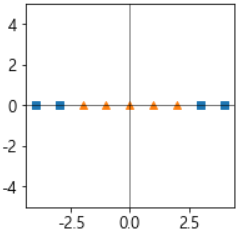

>- <span style='background-color:#fff5b1'> 다항식 특성을 추가하여 차원을 늘려 선형 분리가 되도록 변환</span>
>- 즉, 선형 데이터의 차원을 늘려 비선형으로 만든다음 분리하기 쉽게 한다. 
<center>[2차원으로 변환 $x_3=x_1^2$ 항 추가]</center>

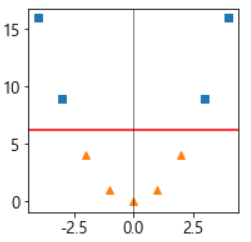

<center>[원래 공간으로 변환]</center>

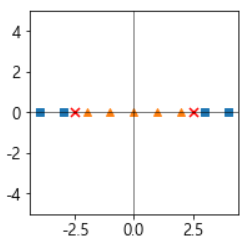

https://www.youtube.com/watch?v=3liCbRZPrZA&t=42s

### Kernel trick(커널 트릭)
- 비선형 데이터셋을 선형으로 분리하기 위해 차원을 변경해야 하는데 이때 사용하는 함수를 **Kernel**이라고 하고 차원을 변경하는 것을 **kernel trick** 이라고 한다.
    - 대표적인 kernel함수 
        - **Radial kernel**
        - Polynomial kernel
        - Sigmoid kernel

- <span style='background-color:#fff5b1'><b style='font-size:1.2em'>Non linear SVM 모델의 하이퍼파라미터</b></span>
    - <span style='background-color:#fff5b1'>**C**</span>
        - 오차 허용기준관련 규제. 
            - <span style='background-color:#fff5b1'>**기본 값은 1이며**</span> 클수록 규제를 강하게 하고 작을 수록 규제를 약하게 한다.
        - 모델이 과대적합(overfitting)일 경우 값을 감소시키고, 과소적합(underfitting)일 경우 값을 증가 시킨다.
    - <span style='background-color:#fff5b1'>**gamma**</span>
        - Kernel함수 규제 값.
            - <span style='background-color:#fff5b1'>**기본 값은 1이며**</span> 클수록 규제를 강하게 하고 작을 수록 규제를 약하게 한다.
        - 모델이 과대적합(overfitting)일 경우 값을 감소시키고, 과소적합(underfitting)일 경우 값을 증가 시킨다.
        

In [9]:
# C를 고정하고 gamma 를 변경하면서 성능의 변화를 확인
# C, gamma: 큰값 - 복합한 모델(강한규제), 작은값 - 단순한 모델.(약한 규제)
#  Overfitting: C, gamma 값들을 감소,
#  Underfitting: C, gamma 값들을 증가.

gamma_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] # 1이 기본값.
train_acc_list = []
test_acc_list = []

for gamma in gamma_list:
    svc = SVC(kernel = 'rbf', # 기본: rbf 함수, 'poly', 'linear', 'sigmoid'
              C = 1,          # C는 기본값인 1로 고정.
              gamma = gamma,  # gamma 값은 for문의 gamma값을 넣는다.
              random_state = 0
             )
    svc.fit(X_train_scaled, y_train)
    
    train_pred = svc.predict(X_train_scaled)
    test_pred = svc.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train, train_pred))
    test_acc_list.append(accuracy_score(y_test, test_pred))

In [10]:
result2 = pd.DataFrame({'train': train_acc_list,
                       'test': test_acc_list},
                      index = gamma_list)
result2.rename_axis('gamma', axis = 0, inplace = True)

In [11]:
result2

,train,test
gamma,,
0.0001,0.791080,0.797203
0.0010,0.950704,0.958042
0.0100,0.985915,0.958042
0.1000,0.995305,0.923077
1.0000,1.000000,0.636364
10.0000,1.000000,0.629371
100.0000,1.000000,0.629371


In [12]:
print(gamma_list)
np.log10(np.array(gamma_list))

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]


array([-4., -3., -2., -1.,  0.,  1.,  2.])

##### ROC AUC score, AP score 
- 모델이 예측한 **양성의 확률** ==> model.predict_proba(X)

In [22]:
# SVC - predict_proba() 호출이 기본적으로는 막혀있다.
# roc-auc score 나 average precision score를 계산하기 위해서는 SVC(probability = True) 해야 predict_proba() 사용할 수 있다.
svc = SVC(C = 1.0, gamma = 0.001, random_state = 0, probability = True)
svc.fit(X_train_scaled, y_train)

SVC(gamma=0.001, probability=True, random_state=0)

In [23]:
test_proba = svc.predict_proba(X_test_scaled)[:, 1] # 양성(1) 확률

>AttributeError: predict_proba is not available when  probability=False
>- 객체(SVC)에 이러한(predict_proba) 메소드가 없으면 AttributeError 에러가 뜸.

In [24]:
from sklearn.metrics import roc_auc_score, average_precision_score
print(roc_auc_score(y_test, test_proba))
print(average_precision_score(y_test, test_proba))

0.9842767295597484
0.990149941588083


## GridSearch로 최적의 조합찾기

##### GridSearchCV 생성 및 학습

- kernel: rbf, linear
- C, gamma : 0.0001 ~ 10 - 10에 제곱배


- LinearSVC: C
- RBF SVC: C, gamma

## 강사님 풀이

In [32]:
# Pipeline
from sklearn.pipeline import Pipeline
steps = [
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state = 0, probability = True))
]
pipeline = Pipeline(steps, verbose = True)

In [33]:
# GridSearchCV
params = {
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

gs = GridSearchCV(pipeline,
                 params,
                 scoring = ['accuracy', 'roc_auc'],
                 refit = 'accuracy',
                  cv = 4,
                  n_jobs = -1
                 )
gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True, random_state=0))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             refit='accuracy', scoring=['accuracy', 'roc_auc'])

In [40]:
gs.best_score_ # refit을 accuracy로 했기 때문에 이 값은 accuracy 값이다.

0.9812643272791395

In [35]:
gs.best_params_

{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [48]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_accuracy').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
97,0.006484,0.000269,0.002225,0.000118,10,0.01,rbf,"{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...",0.971963,0.971963,...,0.981264,0.009302,1,0.993657,0.987687,1.0,0.999621,0.995241,0.005035,4
75,0.007084,0.002585,0.002082,0.001382,1,0.001,linear,"{'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23
72,0.006708,0.002874,0.001369,0.000057,1,0.0001,linear,"{'svc__C': 1, 'svc__gamma': 0.0001, 'svc__kern...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23
81,0.004768,0.000398,0.001246,0.000002,1,0.1,linear,"{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel'...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23
84,0.005267,0.000548,0.001378,0.000022,1,1,linear,"{'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23


In [49]:
result.sort_values('rank_test_roc_auc').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
65,0.011509,0.004209,0.003113,0.002325,0.1,0.1,poly,"{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...",0.859813,0.943925,...,0.922633,0.036270,53,0.998507,0.988433,1.0,0.998864,0.996451,0.004662,1
14,0.008266,0.001801,0.001784,0.000060,0.0001,1,poly,"{'svc__C': 0.0001, 'svc__gamma': 1, 'svc__kern...",0.859813,0.943925,...,0.922633,0.036270,53,0.998134,0.988433,1.0,0.998864,0.996358,0.004623,2
94,0.007994,0.000577,0.002740,0.000075,10,0.001,rbf,"{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...",0.953271,0.962617,...,0.971896,0.014721,14,0.997015,0.985448,1.0,1.000000,0.995616,0.005996,3
97,0.006484,0.000269,0.002225,0.000118,10,0.01,rbf,"{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...",0.971963,0.971963,...,0.981264,0.009302,1,0.993657,0.987687,1.0,0.999621,0.995241,0.005035,4
79,0.012364,0.003932,0.003114,0.000157,1,0.01,rbf,"{'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel...",0.934579,0.962617,...,0.964865,0.020184,16,0.994030,0.986194,1.0,0.998864,0.994772,0.005436,5


In [53]:
# 최종 테스트
best_gs = gs.best_estimator_
test_proba = best_gs.predict_proba(X_test)
print('train set의 정확도: ',accuracy_score(y_train, best_gs.predict(X_train)))
print('test set의 정확도: ',accuracy_score(y_test, best_gs.predict(X_test)))
print('test set의 roc_score: ', roc_auc_score(y_test, test_proba[:, 1]))

train set의 정확도:  0.9906103286384976
test set의 정확도:  0.972027972027972
test set의 roc_score:  0.9953878406708596
